## Семинар 6

## Логистическая регрессия и SVM

#### План:
1. Ирисы Фишера. Свойства логистической регрессии и SVM
2. Логистическая регрессия и SVM на менее приятных данных.
3. ROC-кривая.
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Ирисы Фишера. Свойства логистической регрессии и SVM

Рассмотрим свойства логистической регрессии и метода опорных векторов на примере классического набора данных ["Ирисы Фишера"](https://ru.wikipedia.org/wiki/Ирисы_Фишера). Этот набор состоит из 150 наблюдений, каждое из которых представляет собой четыре измерения: длина наружной доли околоцветника (`sepal length`), ширина наружной доли околоцветника (`sepal width`), длина внутренней доли околоцветника (`petal length`), ширина внутренней доли околоцветника (`petal width`). Каждое наблюдение относится к одному из трёх классов ириса: `setosa`, `versicolor` или `virginica`. Задача состоит в том, чтобы по измерениям предсказать класс цветка.

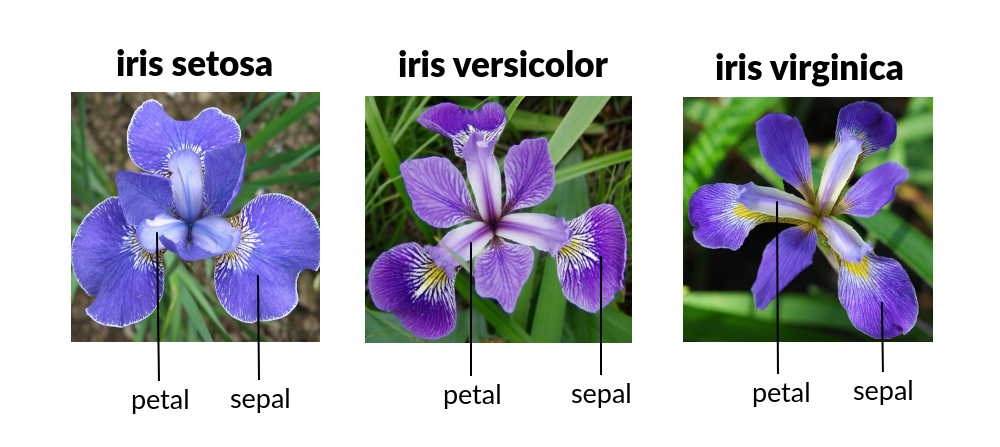

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Задание 1.** Перейдём к задаче бинарной классификации: будем предсказывать принадлежность цветка к виду `versicolor` против принадлежности ко всем прочим видам. Перекодируйте зависимую переменную так, чтобы цветки вида `versicolor` имели метку 1, а прочих видов – метку -1.

In [4]:
# Перекодировка
y[y != 1] = -1

**Задание 2**. Будем работать с двумя признаками: `sepal length (cm)` и `sepal width (cm)`. Отделите их в отдельную матрицу. Разделите выборку на обучающую и тестовую, долю тестовой выборки укажите равной 0.3. Отмасштабируйте выборки при помощи StandardScaler. Постройте диаграмму рассеяния по тренировочной выборке и убедитесь, что данные линейно не разделимы.

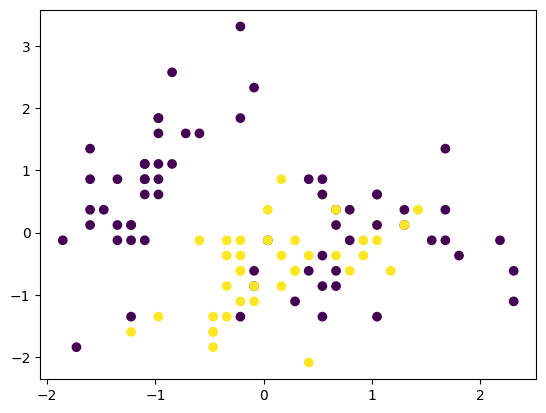

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(123)

X = X[['sepal length (cm)', 'sepal width (cm)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Отмасштабируйте признаки
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)

**Задание 3.** Обучите логистическую регрессию и **SVM с линейным ядром** на тренировочной выборке и убедитесь, что полученные оценки весов действительно различаются. Убедитесь, что `accuracy`, возможно, не подходит в качестве метрики для данной задачи и рассчитайте `f1-меру` на тестовой выборке. Какой алгорим показал более высокое качество?

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [7]:
lr = LogisticRegression()
svm = SVC(kernel = 'linear')

# Обучите логистическую регрессию и SVM
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
pred_svm = svm.predict(X_test)

In [8]:
probs_lr = lr.predict_proba(X_test) # честные вероятности

probs_lr[:,1]

array([0.70582039, 0.42794507, 0.53247213, 0.36230936, 0.09432892,
       0.38375271, 0.80014277, 0.20546421, 0.35790671, 0.6072464 ,
       0.37207571, 0.02507765, 0.52771287, 0.4111971 , 0.47903627,
       0.4111971 , 0.13373592, 0.29663036, 0.45147437, 0.32109053,
       0.15695079, 0.52676074, 0.14519472, 0.38918871, 0.06133819,
       0.16311372, 0.16311372, 0.4866686 , 0.10602806, 0.09630583,
       0.58887916, 0.82841232, 0.21691978, 0.12346406, 0.82841232,
       0.74822088, 0.1104534 , 0.05140326, 0.05140326, 0.56181281,
       0.86496686, 0.22883011, 0.30954298, 0.42234205, 0.56181281])

In [9]:
pred_lr

array([ 1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1])

In [10]:
from sklearn.metrics import accuracy_score, f1_score

f1_score(y_test, pred_lr)

0.6956521739130435

In [11]:
f1_score(y_test, pred_svm)

0.8

In [12]:
lr.coef_, lr.intercept_

(array([[ 0.1816305 , -1.04223331]]), array([-0.63278647]))

In [13]:
svm.coef_ #w, svm.intercept_ #w_0

array([[-3.78448050e-05, -1.01771688e+00]])

Теперь посмотрим, как различаются решающие поверхности алгоритмов.

Код ниже построит решающие поверхности для классификаторов. Чтобы он заработал, нужно обязательно сделать `fit` для `lr` и `svm` выше.

In [14]:
# !pip install mlxtend

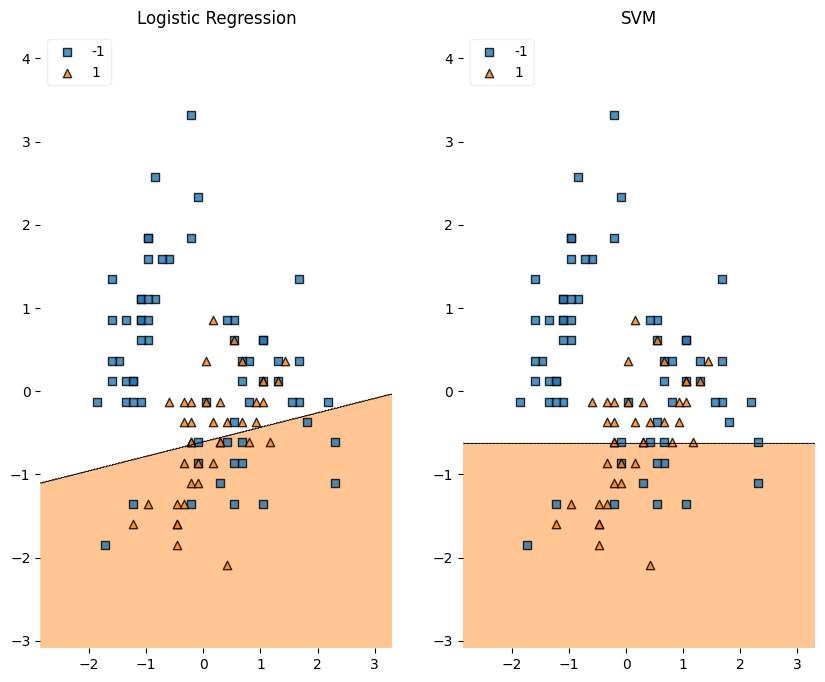

In [15]:
import itertools

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

gs = gridspec.GridSpec(1, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'SVM']
for clf, lab, grd in zip([lr, svm],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = np.array(X_train), y = np.array(y_train), clf=clf, legend=2)
    plt.title(lab)

plt.show()

Теперь изучим свойства каждого классификатора по-отдельности. Начнём с логистической регрессии.

**Задание 3.** Обучите три различные логистические регрессии с разным параметром регуляризации $\alpha$ (обратите внимание, что в реализации `sklearn` $C = 1/\alpha$). Как изменяется разделяющая поверхность в зависимости от $\alpha$?

In [16]:
lr1 = LogisticRegression(C = 0.01)
lr2 = LogisticRegression(C = 0.05)
lr3 = LogisticRegression(C = 10)

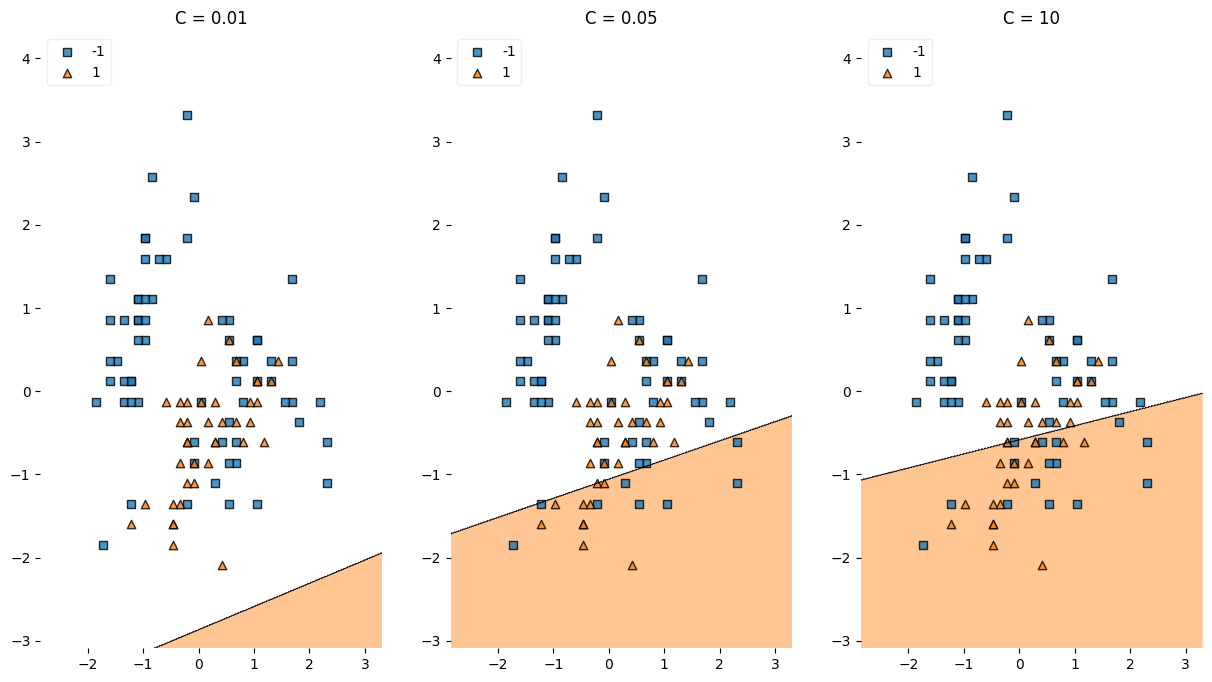

In [17]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15,8))

labels = ['C = 0.01', 'C = 0.05', 'C = 10']
for clf, lab, grd in zip([lr1, lr2, lr3],
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_train, y = np.array(y_train), clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задание 4.** Теперь посмотрим на решение задачи мягкой классификации. При помощи метода `predict_proba()` любой из обученных логистических регрессий сделайте предсказание вероятностей положительного класса.

In [18]:
ans = pd.DataFrame(clf.predict_proba(X_train)[:,1], columns = ['preds'])
ans['fact'] = y_train
ans.sort_values(by = 'preds', ascending = False, inplace = True)
ans

,preds,fact
85,0.853384,1
2,0.789157,1
15,0.746725,-1
47,0.742156,-1
26,0.739881,1
...,...,...
24,0.052495,-1
3,0.052495,-1
40,0.036436,-1
90,0.024298,-1


Перейдём к SVM.

**Задание 4.** Обучите три SVM с линейным ядром с разным параметром регуляризации $C$. Как изменяется разделяющая поверхность в зависимости от $C$?

In [19]:
svc1 = SVC(C = 0.04, kernel = 'linear')
svc2 = SVC(C = 1, kernel = 'linear')
svc3 = SVC(C = 10, kernel = 'linear')

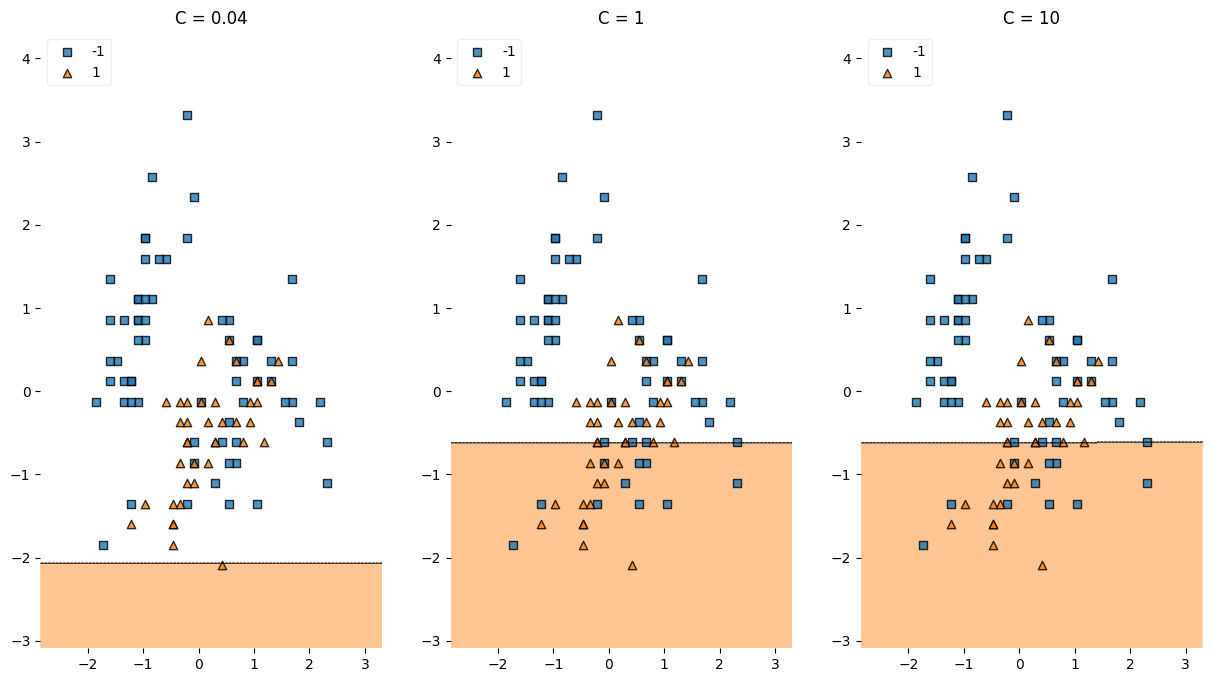

In [20]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15,8))

labels = ['C = 0.04', 'C = 1', 'C = 10']
for clf, lab, grd in zip([svc1, svc2, svc3],
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_train, y = np.array(y_train), clf=clf, legend=2)
    plt.title(lab)

plt.show()

### Логистическая регрессия и SVM на датасете с вином

Мы будем работать с [набором данных](https://www.kaggle.com/piyushgoyal443/red-wine-dataset?select=wineQualityReds.csv), содержащим информацию о характеристиках вина. Каждое наблюдение принадлежит к одному из 10 категорий качества вина, и наша задача заключается в том, что предсказать эту категорию.

In [21]:
data = pd.read_csv('./wineQualityReds.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Как указано в описании набора, в нём нет пропущенных значений, и все переменные являются непрерывными. Целевая переменная – `quality`.

**Задание 1.** Перейдём к задаче бинарной классификации и будем предсказывать только наиболее популярную категорию качества. Закодируйте столбец `quality` так, чтобы наиболее частая категория (это категория 5) получила метку 1, а все прочие категории – метку -1.

In [22]:
data.quality[data.quality == 5] = 1
data.quality[data.quality != 1] = -1

/var/folders/6k/wpzb0pwn71g3ww4by8xqvb6h0000gn/T/ipykernel_76460/2912203865.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data.quality[data.quality == 5] = 1
/var/folders/6k/wpzb0pwn71g3ww4by8xqvb6h0000gn/T/ipykernel_76460/2912203865.p

In [23]:
data.quality.value_counts()

quality
-1    918
 1    681
Name: count, dtype: int64

**Задание 2.** Разделите признаки и целевую переменную. Разделите выборку на тренировочную и тестовую, долю тестовой выборки укажите равной 0.3. При помощи `StandardScaler` отмасштабируйте тренировочную и тестовую выборки.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
X = data.iloc[:, :-1]
y = data.quality

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Отмасштабируйте признаки
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

**Задание 3.** При помощи кросс-валидации (параметры выберите сами) подберите оптимальные значения коэффициентов регуляризации для логистической регрессии и SVM с линейным ядром. Обучите модели с этими параметрами. Убедитесь, что доля правильных ответов – не лучший вариант для нашей задачи и рассчитайте F-меру на тестовой выборке. Какой алгоритм показал себя лучше?

In [27]:
from sklearn.model_selection import cross_validate

scores_svm = []

for c in np.arange(0.1, 20, 0.5):
    svm = SVC(C = c)
    svm.fit(X_train, y_train)

    pred_svm = svm.predict(X_test)
    scores_svm.append((f1_score(y_test, pred_svm), c))
    print(f1_score(y_test, pred_svm), f'C={c}')

0.6481012658227848 C=0.1
0.6600985221674877 C=0.6
0.6763990267639902 C=1.1
0.6731234866828087 C=1.6
0.6796116504854369 C=2.1
0.6893203883495146 C=2.6
0.6780487804878049 C=3.1
0.6878048780487804 C=3.6
0.6909975669099757 C=4.1
0.6941747572815534 C=4.6
0.6908212560386473 C=5.1
0.6924939467312349 C=5.6
0.6973365617433414 C=6.1
0.6973365617433414 C=6.6
0.6924939467312349 C=7.1
0.6941747572815534 C=7.6
0.6926829268292682 C=8.1
0.6958637469586375 C=8.6
0.7021791767554479 C=9.1
0.7021791767554479 C=9.6
0.6990291262135923 C=10.1
0.7024390243902439 C=10.6
0.7024390243902439 C=11.1
0.7007299270072993 C=11.6
0.7007299270072993 C=12.1
0.7007299270072993 C=12.6
0.7007299270072993 C=13.1
0.7007299270072993 C=13.6
0.7053140096618358 C=14.1
0.7053140096618358 C=14.6
0.7053140096618358 C=15.1
0.7115384615384616 C=15.6
0.7129186602870813 C=16.1
0.7129186602870813 C=16.6
0.7115384615384616 C=17.1
0.7115384615384616 C=17.6
0.709832134292566 C=18.1
0.7064439140811456 C=18.6
0.7064439140811456 C=19.1
0.70644

## Метрические методы. k Nearest Neighbours

### Теоретическая часть


__Вспомнить из лекции:__
* Как в методе k ближайших соседей выполняются предсказания в задаче классификаци и регрессии?
* Что такое гипотеза компактности?
* Какие функции расстояния можно использовать для вещественных признаков, категориальных признаков, строковых признаков, множественнозначных признаков?

#### Задача 1.
Предположим, мы решаем задачу классификации на три класса по двум признакам и используем метод k ближайших соседей с k=3 и манхэттэнской метрикой. Мы имеем следующую обучающую выборку:

| Признак 1 | Признак 2 | Класс |
|-----------|-----------|-------|
| 1         | -1        | 1     |
| 2         | 2         | 1     |
| 3         | 2         | 2     |
| 1         | 0         | 3     |
| 2         | -2        | 3     |

Каковы будут предсказания для объекта $x=(2, -1)$?

__Решение.__

Алгоритм предсказания kNN для задачи классификации:
1. Вычислить расстояние от каждого объекта обучающей выборки до тестового объекта.
1. Найти k объектов обучающей выборки (соседей) с наименьшим расстоянием до тестового объекта.
1. Вернуть наиболее встречающийся класс среди k соседей.

Вычислим расстояния. Расстояние от первого объекта в обучении до тестового объекта $x$ (манхэттэнская метрика):

$$|1-2| + |-1-(-1)| = 1.$$

Аналогично для 2-5 объектов: получатся расстояния 3, 4, 2, 1.

Находим 3 ближайших объекта: это объекты с номерами 1, 4, 5 (расстояния 1, 2, 1 соответственно). Эти три объекта относятся к классам 1, 3, 3. Чаще всего встречается класс 3, поэтому предсказываем 3.

#### Задача 2.
Визуализируйте разделяющую поверхность между классами для следующей выборки:

| Признак 1 | Признак 2 | Класс |
|-----------|-----------|-------|
| 2         | 2        | 1     |
| 3         | 2         | 1     |
| 2         | 0         | 2     |
| 1         | -1         | 3     |
| 1        | 1        | 3     |

Используйте k=1 и евклидово расстояние.

__Решение.__

В задачах классификации с двумя признаками мы можем изобразить признаковое пространство на плоскости и раскрасить его в разные цвета в соответствии с классом каждой точки плоскости. В этом и состоит сейчас наша задача.

Для начала отобразим на плоскости обучающую выборку - пять точек - в соответствии с их координатами.

При $k=1$ каждая точка плоскости будет относиться к тому же классу, что и ближайший к ней объект обучающей выборки. Если нам даны две точки разных классов, то чтобы провести между ними границу классов, нужно построить серединный перпендикудяр. Для случая с несколькими точками нужно построить несколько серединных перпендикуляров, найти их точки пересечения и определить, какие области к каким классам относятся. Более строго такая конструкция задается с помощью [Диаграммы Вороного](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D0%BE%D0%B3%D0%BE), но мы не будем вдаваться в ее детали.

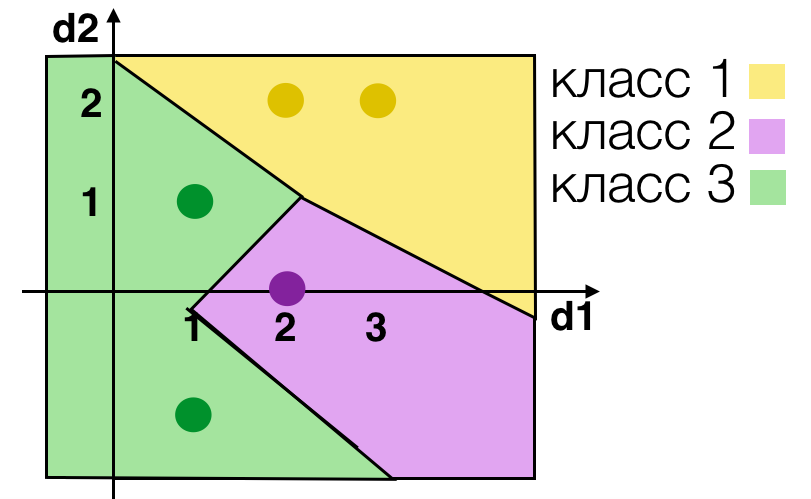

#### Задача 3.
Предположим, мы решаем задачу регрессии по двум признакам и используем метод k ближайших соседей с k=3 и манхэттанской метрикой. Мы имеем следующую обучающую выборку:

| Признак 1 | Признак 2 | Ответ |
|-----------|-----------|-------|
| 1         | -1        | 3.5     |
| 2         | 2         | 2.3     |
| 3         | 2         | 1.7     |
| 1         | 0         | -0.4     |
| 2         | -2        | 0.1     |

Каковы будут предсказания для объекта $x=(2, -1)$?

__Решение.__
Предсказания kNN для регрессии отличаются от предсказаний для классификации только финальным шагом: вместо поиска наиболее часто встречающегося класса нужно усреднить ответы на соседях. Признаки в этой задаче те же, что в задаче 1, поэтому соседей мы уже знаем: это объекты с номерами 1, 4, 5. На них мы имеем ответы 3.5, -0.3, 0.1. Усредним их: (3.5-0.4+0.1)/3 = 1.1. Предсказываем 1.1.

#### Вопрос: каковы параметры и гиперпараметры метода kNN?
__Ответ:__

Параметры - это величины, которые мы настраиваем в процессе обучения по обучающей выборке. В методе kNN нет как такового обучения - это очень простой эвристический алгоритм. Под параметрами в kNN можно понимать обучающую выборку. В другой трактовке у метода нет параметров.

Гиперпараметры - это величины, которые мы должны установить до начала обучения модели. Гиперпараметры не настраиваются по обучающей выборке в процессе обучения модели. Два самых важных гиперпараметры метода kNN - это число соседей k и метрика. Используя разные комбинации этих гиперпараметров, можно получать совершенно разное качество работы алгоритма. Гиперпараметры обычно настраивают по валидационной выборке или используя кросс-валидацию.

#### Какова динамика качества работы kNN при увеличении k?

__Ответ:__

При $k=1$ вокруг каждого объекта обучающей выборки создается область его класса. Если, к примеру, в "большую" область одного класса случайно попал один шумовой объект другого класса, вокруг этого шумового объекта будет "остров" предсказания другого класса. Это нелогично и говорит о переобучении.

При $k$, равном числу объектов в выборке, для всех объектов будет предсказываться одно и то же, что вновь говорит о низком качестве работы классификатора. Получается, что качество kNN при увеличении $k$ должно сначала расти, а потом падать, и оптимум будем где-то посередине.

Рассмотрим синтетический пример: на рисунке визуализирована обучающая выборка ("настоящая" разделяющая поверхность - прямая) и разделяющая поверхность kNN по аналогии с задачей 2, и на разных графиках используется разное число соседей $k$:

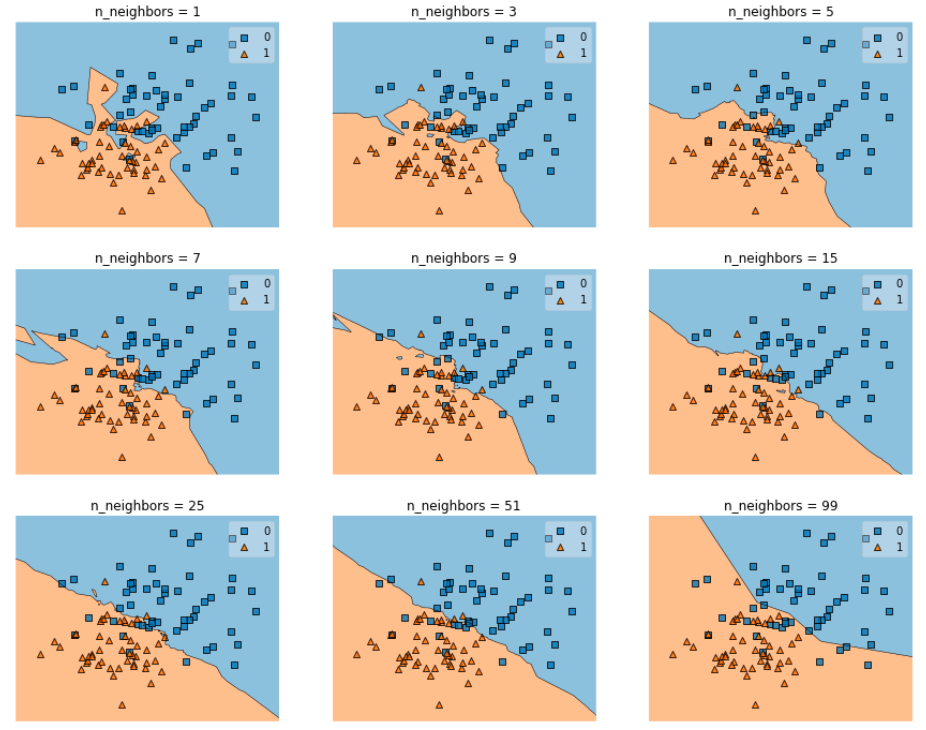

При использовании малых $k$ разделяющая поверхность слишком сложная, на нее оказывают сильное воздействие шумовые объекты. Далее поверхность становится все ровнее и ровнее и при $k=50$ выглядит наиболее разумно. При большем k разделяющая поверхность уходит от линейной, и оранжевый класс "захватывает" синий.

#### Почему при использовании kNN важно нормировать данные?

__Ответ:__

Рассмотрим для примера манхэттэнскую метрику. Если один признак будет иметь масштаб около 1000, а другой - около 1, то когда мы будем складывать модули разностей для этих двух признаков, второй признак практически не будет иметь влияния на ответ. Если же признаки отнормировать, но они все будут в одной шкале.

### Практическая часть

In [28]:
import numpy as np
import pandas as pd
import sklearn

# изображения цифр
from sklearn.datasets import load_digits
# классификатор
from sklearn.neighbors import KNeighborsClassifier
# шаффлер данных
from sklearn.utils import shuffle

In [29]:
clf = KNeighborsClassifier(n_neighbors=3)

data = load_digits()
X = data.images
y = data.target

X.shape

(1797, 8, 8)

In [30]:
X[1], y[1]

(array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]),
 np.int64(1))

In [31]:
# вытягиваем квадратное изображение в вектор, чтобы получить матрицу объекты-признаки
X = X.reshape(X.shape[0], -1)

# перемешиваем данные
X, y = shuffle(X, y)
print(f"Features shape: {X.shape},\nTarget shape: {y.shape}")
print(f"Target samples: {y[:10]}")

Features shape: (1797, 64),
Target shape: (1797,)
Target samples: [3 9 9 3 5 5 6 1 0 4]


In [32]:
X_train, y_train = X[:700, :], y[:700]
X_val, y_val = X[700:1300, :], y[700:1300]
X_test, y_test = X[1300:, :], y[1300:]

In [33]:
# Обучаем классификатор и делаем предсказания
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

In [34]:
# Вычисляем простейшую метрику качества алгоритма - долю правильных ответов
print("Accuracy is: ", np.mean(y_test==y_predicted))

Accuracy is:  0.9798792756539235


Учитывая, что у нас 10 классов, то вероятность угадать правильный ответ много раз очень мала. Поэтому полученное значение accuracy - очень хороший результат!

Попробуем использовать разные значения гиперпараметра k. Сравнивать разные значения k по обучающей выборке бесполезно: каждый объект является ближайшим сам к себе и оптимальное k будет равно 1. Будем сравнивать разные k по качеству на валидационной выборке:

In [35]:
# Подбор k на валидационной выборке:
k_best = -1
best_accuracy = 0

for k in range(1, 20):
    y_predicted = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_val)

    val_accuracy = np.mean(y_predicted==y_val)
    print(f"k = {k}; accuracy = {val_accuracy:.3f}")

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        k_best = k

k_best

k = 1; accuracy = 0.983
k = 2; accuracy = 0.978
k = 3; accuracy = 0.987
k = 4; accuracy = 0.983
k = 5; accuracy = 0.982
k = 6; accuracy = 0.980
k = 7; accuracy = 0.977
k = 8; accuracy = 0.973
k = 9; accuracy = 0.972
k = 10; accuracy = 0.968
k = 11; accuracy = 0.965
k = 12; accuracy = 0.962
k = 13; accuracy = 0.963
k = 14; accuracy = 0.962
k = 15; accuracy = 0.960
k = 16; accuracy = 0.957
k = 17; accuracy = 0.957
k = 18; accuracy = 0.957
k = 19; accuracy = 0.953


3

Сравним accuracy на обучении, валидации и тесте для найденного лучшего значения k:

In [36]:
clf = KNeighborsClassifier(n_neighbors=k_best)
clf.fit(X_train, y_train)

for X_data, y_data in zip([X_train, X_val, X_test], [y_train, y_val, y_test]):
    y_predicted = clf.predict(X_data)
    print(f"Accuracy: {np.mean(y_predicted==y_data):.3f}")

Accuracy: 0.994
Accuracy: 0.987
Accuracy: 0.980
